# ASSIGNMENT-2

## Name: Govind Agarwal
## Reg. No.: 20BCE1618

#### Loading dataset

In [96]:
import numpy as np
import pandas as pd

In [97]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [99]:
for col in df:
    print(col,df[col].unique())

survived [0 1]
pclass [3 1 2]
sex ['male' 'female']
age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4 6]
fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.

In [100]:
df['adult_male'] = df['adult_male'].astype('category') 
df['alone'] = df['alone'].astype('category') 
df['pclass'] = df['pclass'].astype('category') 
df['survived'] = df['survived'].astype('category') 

#### Handling Missing Values

In [101]:
df.shape

(891, 15)

In [102]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [103]:
df=df.drop(['deck'],axis=1)

In [104]:
df.shape

(891, 14)

In [105]:
df['age'] = df['age'].fillna(df['age'].mean())

In [106]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [107]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Descriptive Statistics

In [108]:
df.mean(numeric_only=True)

age      29.699118
sibsp     0.523008
parch     0.381594
fare     32.204208
dtype: float64

In [109]:
df.median(numeric_only=True)

age      29.699118
sibsp     0.000000
parch     0.000000
fare     14.454200
dtype: float64

In [110]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,29.699118,0,0,8.05,S,Third,man,True,Southampton,no,True


In [111]:
df.max(numeric_only=True)

age       80.0000
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64

In [112]:
df.min(numeric_only=True)

age      0.42
sibsp    0.00
parch    0.00
fare     0.00
dtype: float64

In [113]:
df_range = df.max(numeric_only=True)-df.min(numeric_only=True)
df_range

age       79.5800
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64

In [114]:
df.var(numeric_only=True)

age       169.052400
sibsp       1.216043
parch       0.649728
fare     2469.436846
dtype: float64

In [115]:
df.std(numeric_only=True)

age      13.002015
sibsp     1.102743
parch     0.806057
fare     49.693429
dtype: float64

In [116]:
df.skew(numeric_only=True)

age      0.434488
sibsp    3.695352
parch    2.749117
fare     4.787317
dtype: float64

In [117]:
df.kurt(numeric_only=True)

age       0.966279
sibsp    17.880420
parch     9.778125
fare     33.398141
dtype: float64

In [118]:
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### Univariate Analysis Visualization

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

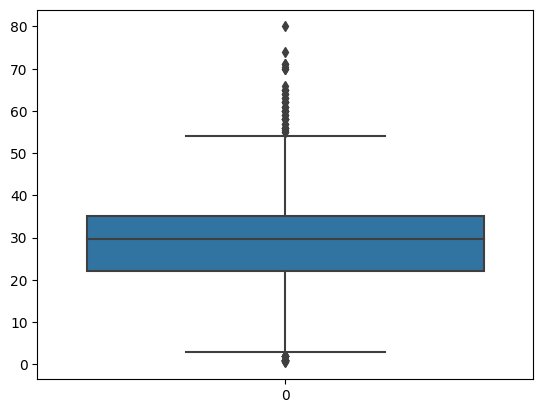

In [120]:
sns.boxplot(df['age'])

<AxesSubplot:>

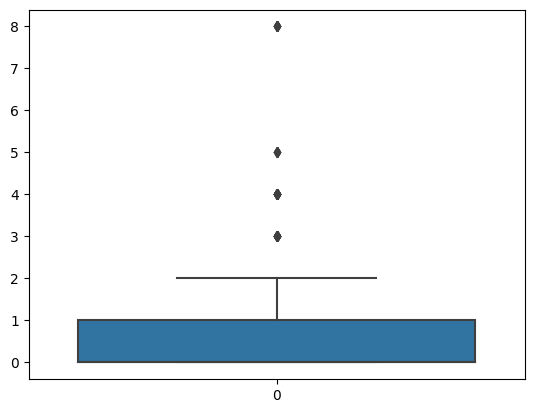

In [121]:
sns.boxplot(df['sibsp'])

<AxesSubplot:>

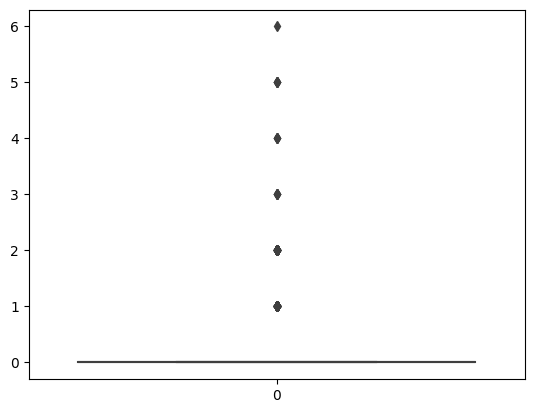

In [122]:
sns.boxplot(df['parch'])

<AxesSubplot:>

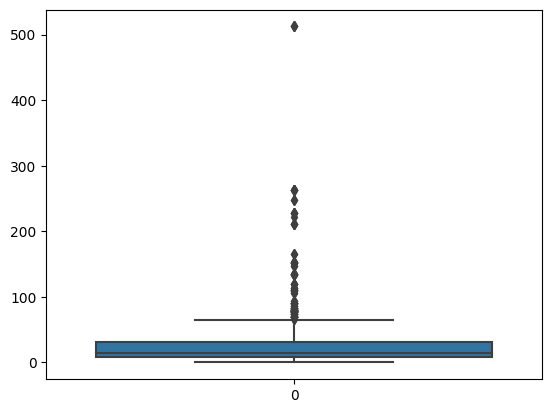

In [123]:
sns.boxplot(df['fare'])

<AxesSubplot:xlabel='survived', ylabel='count'>

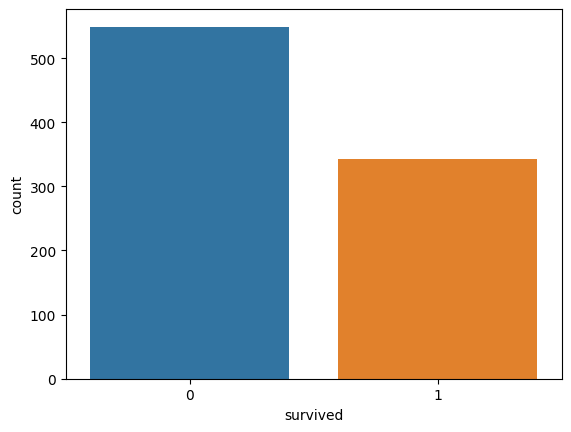

In [124]:
sns.countplot(x=df['survived'])

<AxesSubplot:xlabel='pclass', ylabel='count'>

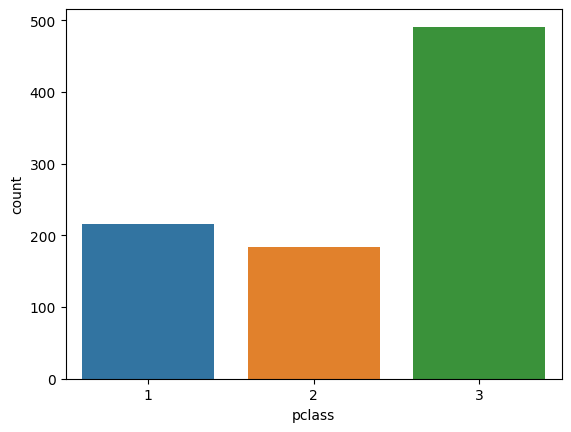

In [125]:
sns.countplot(x=df['pclass'])

<AxesSubplot:xlabel='sex', ylabel='count'>

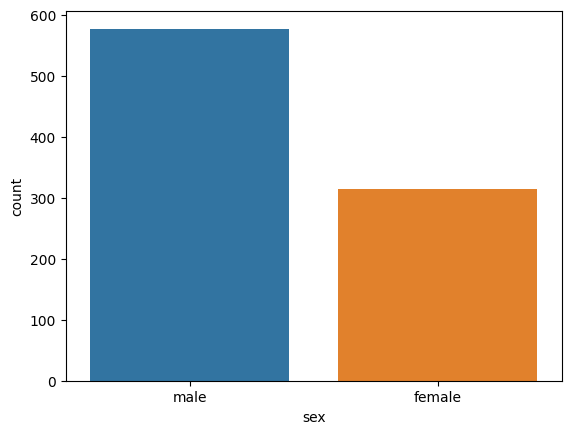

In [126]:
sns.countplot(x=df['sex'])

<AxesSubplot:xlabel='embarked', ylabel='count'>

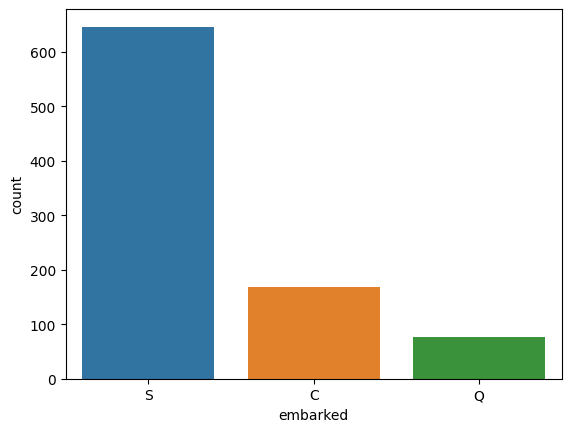

In [127]:
sns.countplot(x=df['embarked'])

<AxesSubplot:xlabel='class', ylabel='count'>

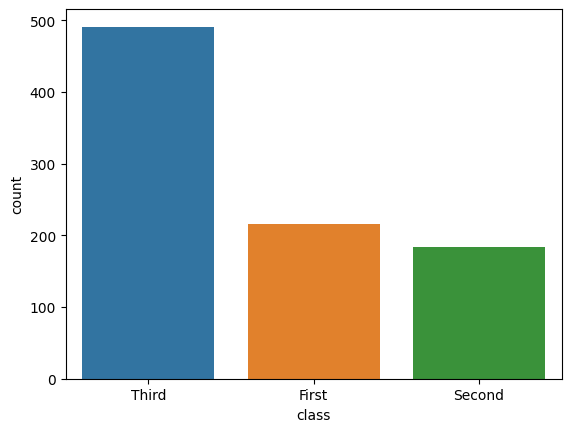

In [128]:
sns.countplot(x=df['class'])

<AxesSubplot:xlabel='who', ylabel='count'>

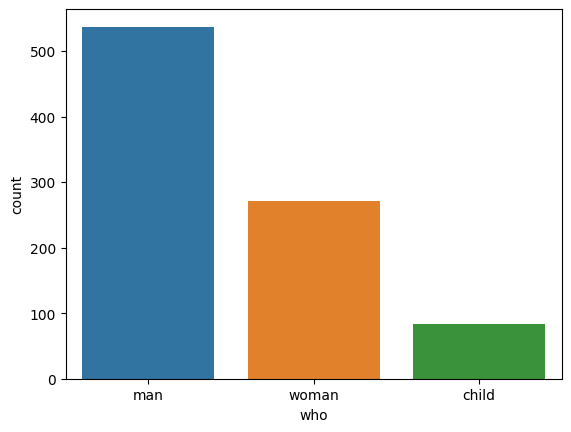

In [129]:
sns.countplot(x=df['who'])

<AxesSubplot:xlabel='adult_male', ylabel='count'>

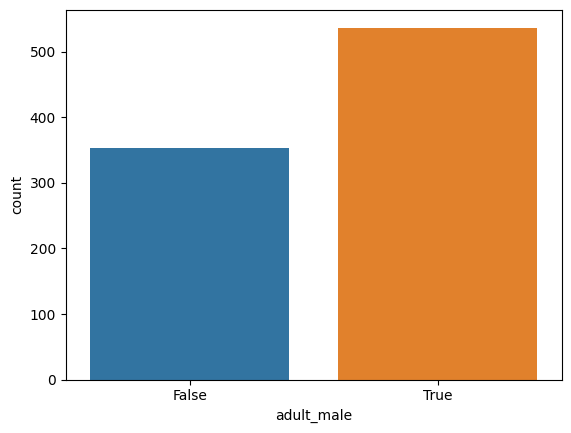

In [130]:
sns.countplot(x=df['adult_male'])

<AxesSubplot:xlabel='embark_town', ylabel='count'>

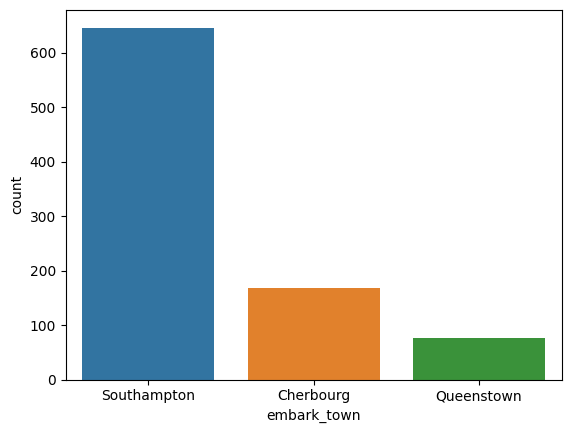

In [131]:
sns.countplot(x=df['embark_town'])

<AxesSubplot:xlabel='alive', ylabel='count'>

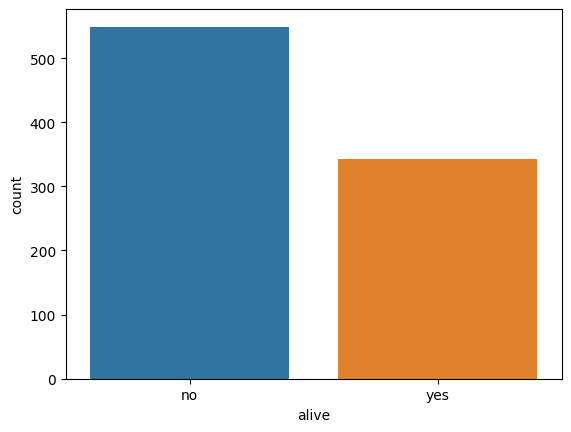

In [132]:
sns.countplot(x=df['alive'])

<AxesSubplot:xlabel='alone', ylabel='count'>

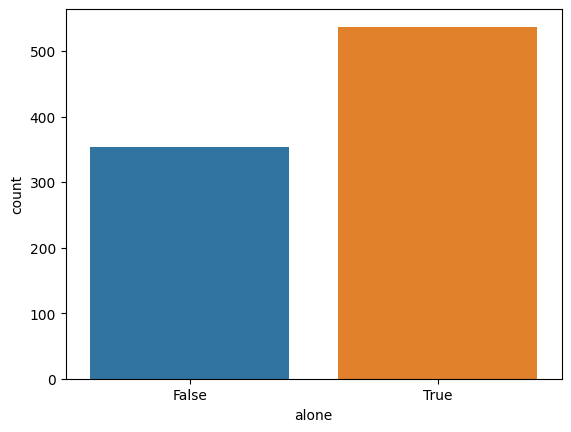

In [133]:
sns.countplot(x=df['alone'])

#### Bi-Variate Analysis Visualization

<AxesSubplot:xlabel='survived', ylabel='age'>

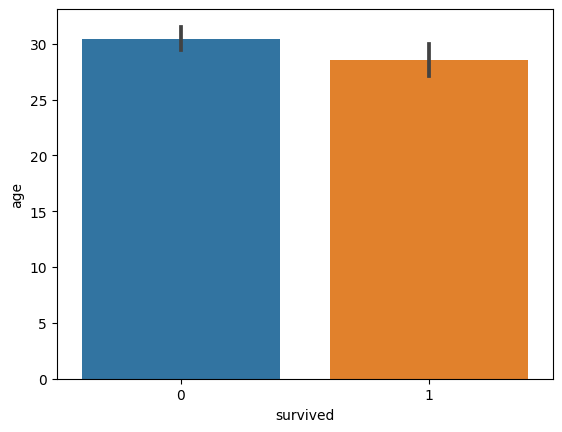

In [134]:
sns.barplot(x=df['survived'], y=df['age'])

<AxesSubplot:xlabel='sibsp', ylabel='count'>

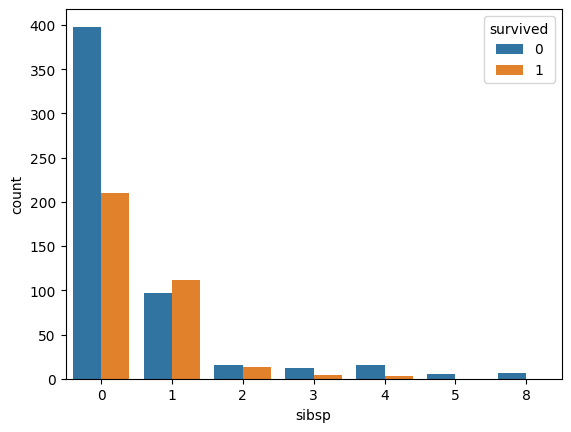

In [135]:
sns.countplot(x=df['sibsp'],hue=df['survived'])

<AxesSubplot:xlabel='parch', ylabel='count'>

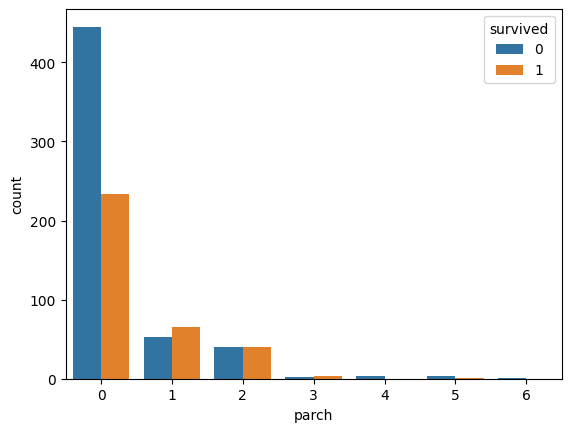

In [136]:
sns.countplot(x=df['parch'],hue=df['survived'])

<AxesSubplot:xlabel='survived', ylabel='sibsp'>

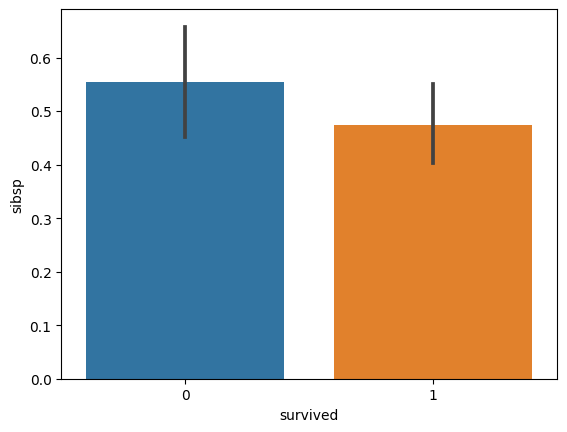

In [137]:
sns.barplot(x=df['survived'], y=df['sibsp'])

<AxesSubplot:xlabel='survived', ylabel='parch'>

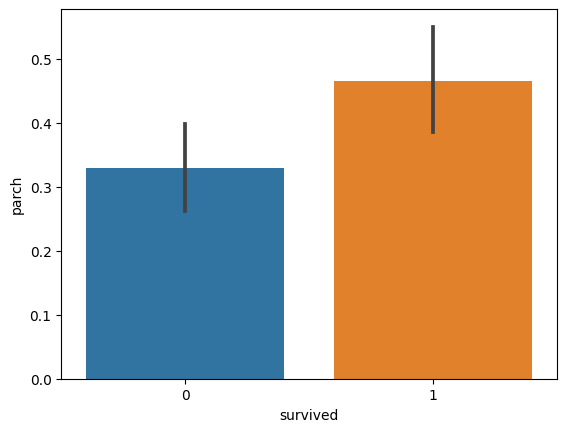

In [138]:
sns.barplot(x=df['survived'], y=df['parch'])

<AxesSubplot:xlabel='survived', ylabel='fare'>

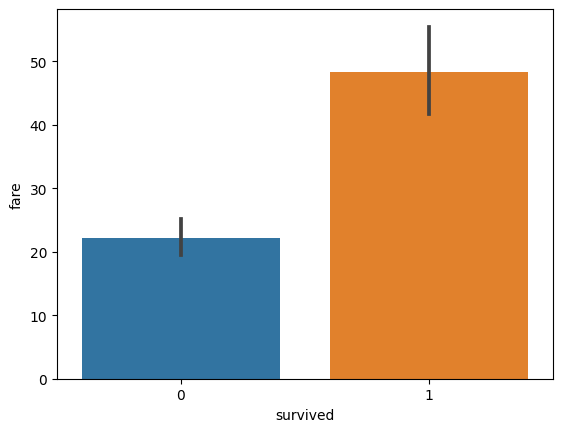

In [139]:
sns.barplot(x=df['survived'], y=df['fare'])

<AxesSubplot:xlabel='pclass', ylabel='count'>

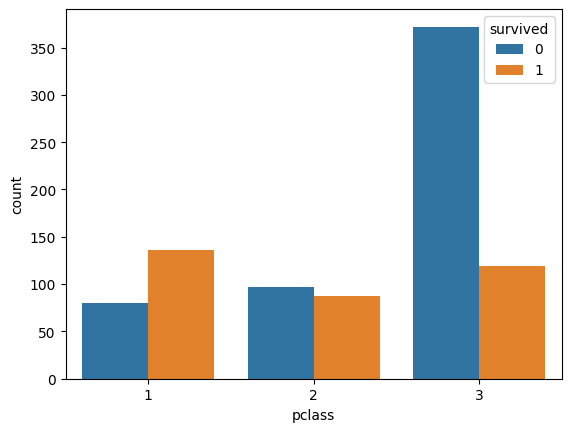

In [140]:
sns.countplot(x=df['pclass'],hue=df['survived'])

<AxesSubplot:xlabel='sex', ylabel='count'>

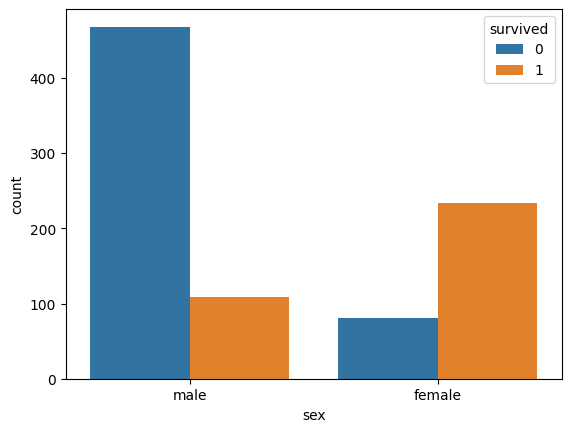

In [141]:
sns.countplot(x=df['sex'],hue=df['survived'])

<AxesSubplot:xlabel='embarked', ylabel='count'>

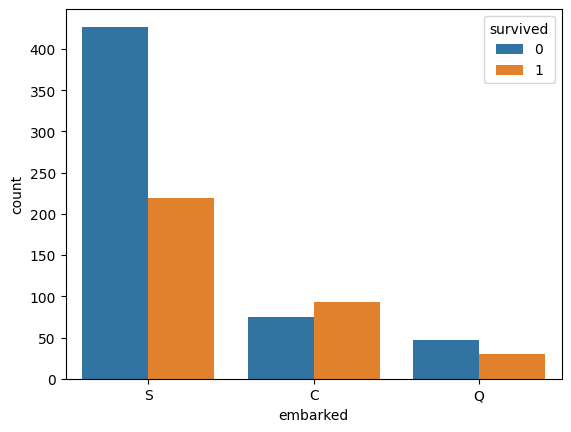

In [142]:
sns.countplot(x=df['embarked'],hue=df['survived'])

<AxesSubplot:xlabel='class', ylabel='count'>

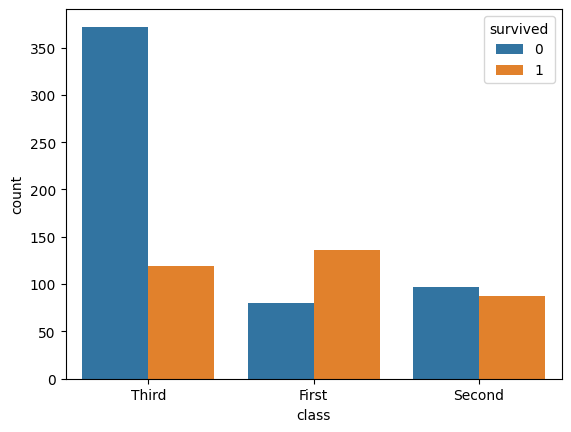

In [143]:
sns.countplot(x=df['class'],hue=df['survived'])

<AxesSubplot:xlabel='who', ylabel='count'>

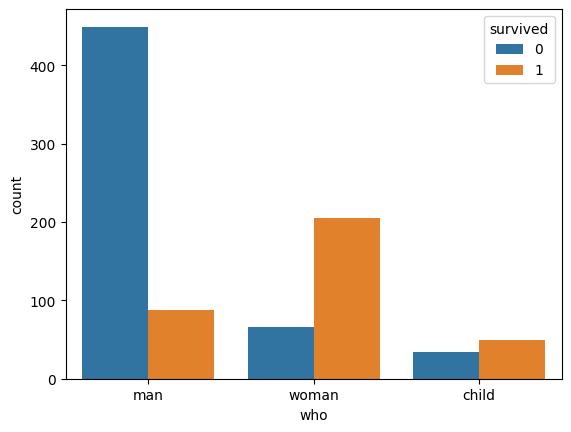

In [144]:
sns.countplot(x=df['who'],hue=df['survived'])

<AxesSubplot:xlabel='adult_male', ylabel='count'>

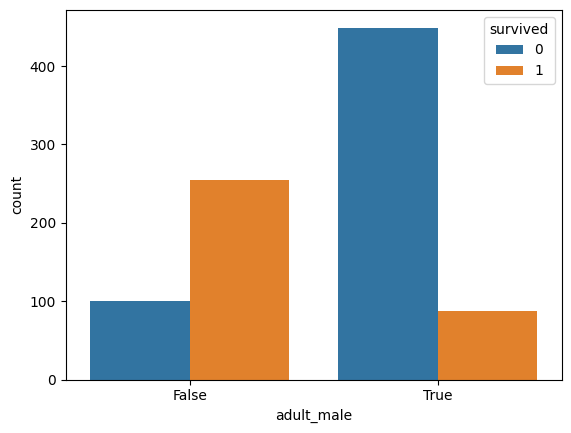

In [145]:
sns.countplot(x=df['adult_male'],hue=df['survived'])

<AxesSubplot:xlabel='embark_town', ylabel='count'>

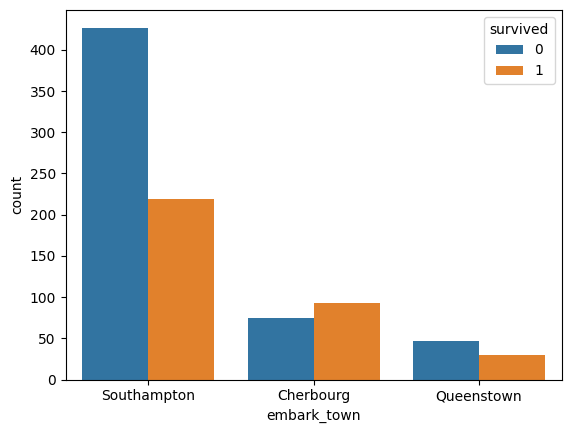

In [146]:
sns.countplot(x=df['embark_town'],hue=df['survived'])

<AxesSubplot:xlabel='alive', ylabel='count'>

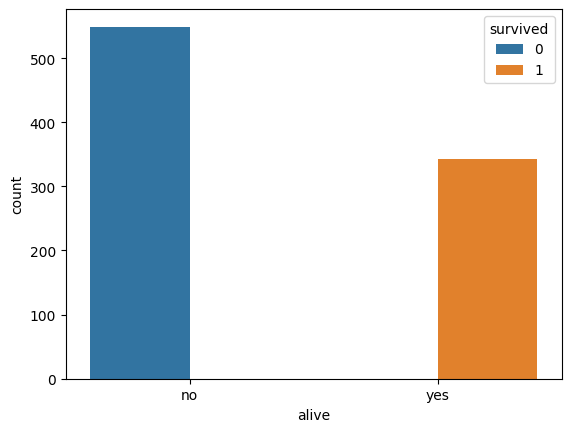

In [147]:
sns.countplot(x=df['alive'],hue=df['survived'])

<AxesSubplot:xlabel='alone', ylabel='count'>

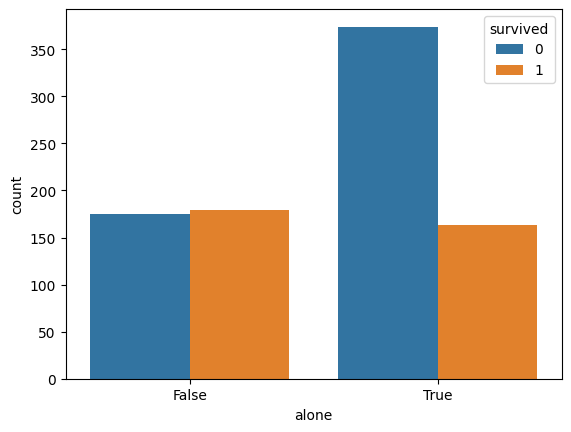

In [148]:
sns.countplot(x=df['alone'],hue=df['survived'])

#### Multi-Variate Analysis Visualization

<AxesSubplot:xlabel='fare', ylabel='age'>

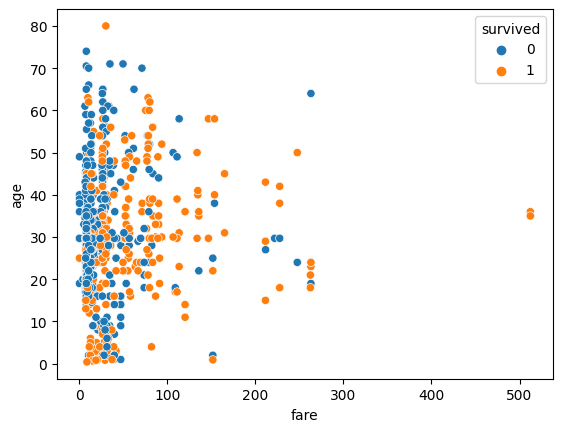

In [149]:
sns.scatterplot(x=df['fare'], y=df['age'], hue=df['survived'])

<AxesSubplot:xlabel='sibsp', ylabel='parch'>

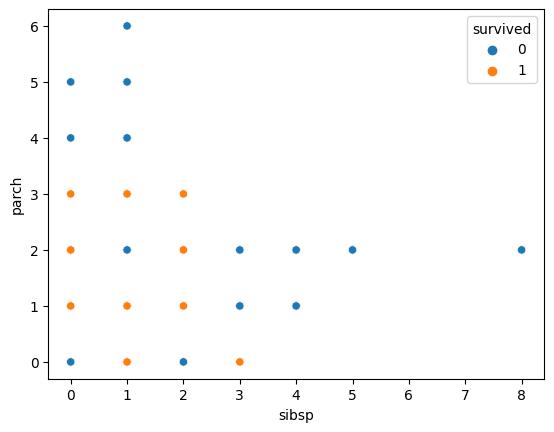

In [150]:
sns.scatterplot(x=df['sibsp'], y=df['parch'], hue=df['survived'])

##### Heatmap

C:\Users\Govind\AppData\Local\Temp\ipykernel_14096\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

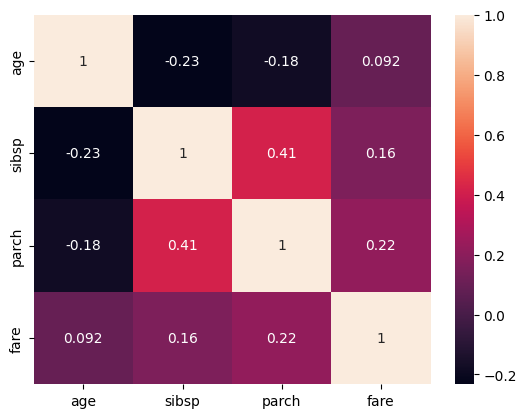

In [151]:
sns.heatmap(df.corr(), annot=True)

#### Handling Outliers

In [152]:
quantile=df.quantile(q=[0.75,0.25],numeric_only=True)
quantile

,age,sibsp,parch,fare
0.75,35.0,1.0,0.0,31.0000
0.25,22.0,0.0,0.0,7.9104


In [153]:
quantile.iloc[0]

age      35.0
sibsp     1.0
parch     0.0
fare     31.0
Name: 0.75, dtype: float64

In [154]:
IQR=quantile.iloc[0]-quantile.iloc[1]

In [155]:
upper_extreme=quantile.iloc[0]+(1.5*IQR)
upper_extreme

age      54.5000
sibsp     2.5000
parch     0.0000
fare     65.6344
dtype: float64

In [156]:
lower_extreme=quantile. iloc[1]-(1.5* IQR)
lower_extreme

age       2.500
sibsp    -1.500
parch     0.000
fare    -26.724
dtype: float64

In [157]:
df.shape

(891, 14)

In [158]:
df = df[df['age'] <= upper_extreme[0]]
df = df[df['age'] >= lower_extreme[0]]
df = df[df['sibsp'] <= upper_extreme[1]]
df = df[df['sibsp'] >= lower_extreme[1]]
df = df[df['parch'] <= upper_extreme[2]]
df = df[df['parch'] >= lower_extreme[2]]
df = df[df['fare'] <= upper_extreme[3]]
df = df[df['fare'] >= lower_extreme[3]]
df.shape

(577, 14)

#### Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder

In [162]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [163]:
lst = ['sex','embarked','class','who','adult_male','embark_town','alive','alone']

le = LabelEncoder()
df[lst] = df[lst].apply(le.fit_transform)

In [164]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1
5,0,3,1,29.699118,0,0,8.4583,1,2,1,1,1,0,1


#### Split the data into dependent and independent variables

In [166]:
x=df.iloc[:,1:14]
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0
2,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1
5,3,1,29.699118,0,0,8.4583,1,2,1,1,1,0,1


In [168]:
y=df.iloc[:,0:1]
y.head()

,survived
0,0
2,1
3,1
4,0
5,0


#### Scale the independent variables

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
x = MinMaxScaler().fit_transform(x)

####  Split the data into training and testing

In [161]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [175]:
X_train.shape

(386, 13)

In [176]:
y_train.shape

(386, 1)

In [177]:
X_test.shape

(191, 13)

In [178]:
y_test.shape

(191, 1)